**The Euclidean Distance**


In [2]:
import numpy as np
import seaborn as sns

# def distance(a, b):
#     return np.sqrt(np.sum(np.pow((a - b), 2)))
def distance(a, b):
    return np.sum(np.abs(a - b))

**Dynamic Programming Algorithm**


In [3]:
def dtw_matrix(grp1, grp2):
    n, m = grp1.shape[0], grp2.shape[0]
    
    # Creating the matrix
    matrix_dtw = np.zeros((m, n))
    
    #Initialization
    matrix_dtw[0, 0] = 2 * distance(grp1[0], grp2[0])
    matrix_dtw[0,1:] = float('inf')
    
    # filling the first line
    for k in range(1, m):
        matrix_dtw[k,0] = matrix_dtw[k-1,0] + distance(grp1[0],grp2[k])
    
    # Filling the matrix following the rule of DTW
    for i in range(1,m):
        for j in range(1,n):
            dist = distance(grp2[i], grp1[j])
            dpp1 = matrix_dtw[i-1, j] + dist
            dpp2 = matrix_dtw[i-1, j-1] + 2 * dist
            dpp3 = matrix_dtw[i, j-1] + dist
            matrix_dtw[i,j] = min(dpp1,dpp2,dpp3)

    return matrix_dtw

**Tracing(or tracking, I'm not sure about the word) The Optimum Path**

In [4]:
def path_trace(matrix_dtw):
    i, j = matrix_dtw.shape[0] - 1, matrix_dtw.shape[1] - 1
    path = []
    
    # Storing the top left points
    path.append((i,j)) 
    
    while i > 0 and j > 0:
        # Values of each cell to check which one of them is the minimun
        e1 = matrix_dtw[i-1,j-1]
        e2 = matrix_dtw[i-1,j]
        e3 = matrix_dtw[i, j-1]
        
        minimunm = min(e1, e2, e3)
        
        if minimunm == e1:
            path.append((i-1,j-1))
            i = i-1
            j = j-1
            
        elif minimunm == e2:
            path.append((i-1,j))
            i = i-1
            
        elif minimunm == e3:
            path.append((i, j-1))
            j = j-1
            
    return path

**Visualisation uisng ```matplotlib.pyplot```**

In [5]:
import matplotlib.pyplot as plt

def visualiser_alignement(serie1, serie2, path):
    n, m = len(serie1), len(serie2)
    plt.figure(figsize=(10, 6))

    plt.plot(range(n), [0] * n, 'ro-', label='Série 1 (s1)', markersize=10)
    plt.plot(range(m), [1] * m, 'bo-', label='Série 2 (s2)', markersize=10)

# Tracer le chemin d'alignement
    for (i, j) in path:
        plt.plot([i, j], [0, 1], 'k--')  # Lignes pointillées entre les points

# Annotations
    plt.xticks(range(max(n, m)), [str(serie1[i]) if i < n else '' for i in range(max(n, m))])
    plt.yticks([0, 1], ['Série 1', 'Série 2'])
    plt.title("Visualisation Of the optimal path")
    plt.xlabel("Position dans la Série 1")
    plt.ylabel("Position dans la Série 2")
    plt.legend()
    plt.grid()
    plt.show()


def visualiser_DTW_heatmap(matrix_dtw, chemin):
    # Create a copy of the matrix to highlight the path
    matrix_with_path = matrix_dtw.copy()

    plt.figure(figsize=(10, 8))
    
    # Plotting the heatmap with the adjusted path
    sns.heatmap(matrix_with_path, cmap="YlGnBu", annot=True, fmt=".1f", cbar=False, linewidths=0.5)

    # Plotting the optimal path with bold lines
    path_x = [j for (i, j) in chemin]  # X coordinates of the path
    path_y = [i for (i, j) in chemin]  # Y coordinates of the path
    
    # Drawing bold red lines for the path
    for k in range(len(path_x) - 1):
        plt.plot([path_x[k], path_x[k + 1]], [path_y[k], path_y[k + 1]], 'r-', lw=4)  # Red, thick lines for path
    
    # Plotting the points on the path as red dots
    plt.plot(path_x, path_y, 'ro', markersize=8)  # Red dots for the path points

    plt.title("Heatmap of the DTW Matrix with Enhanced Path Visualization")
    plt.xlabel("Series 1")
    plt.ylabel("Series 2")
    plt.show()

# TESTS


**TEST 1**

The matrix: 
[[ 2. inf inf inf inf]
 [ 4.  4.  4.  5.  7.]
 [ 7.  6.  5.  4.  5.]
 [11.  9.  7.  5.  4.]
 [16. 13. 10.  7.  5.]
 [22. 18. 14. 10.  7.]]

The Path: 
[(5, 4), (4, 4), (3, 4), (2, 3), (1, 2), (1, 1), (0, 0)]


c:\Users\Manina\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


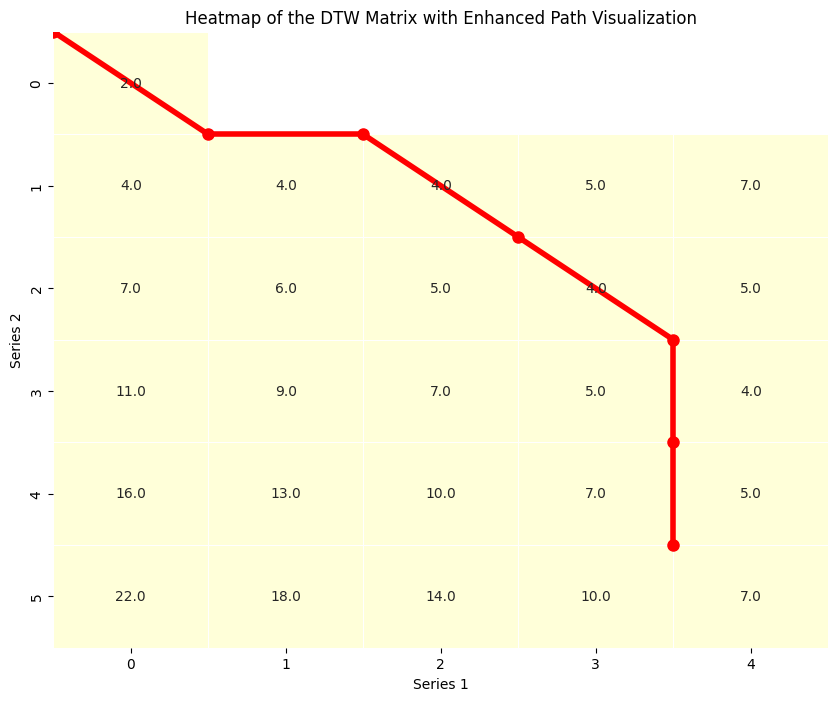

In [6]:
serie1 = np.array([1, 2, 3, 4, 5])
serie2 = np.array([2, 3, 4, 5, 6, 7])

matrix = dtw_matrix(serie1, serie2)
print(f"The matrix: \n{matrix}")

path = path_trace(matrix)
print(f"\nThe Path: \n{path}")

visualiser_DTW_heatmap(matrix,path)

**TEST 2**

c:\Users\Manina\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


The matrix:
[[10. inf inf]
 [15. 17. 19.]]

The path:
[(1, 2), (1, 1), (0, 0)]


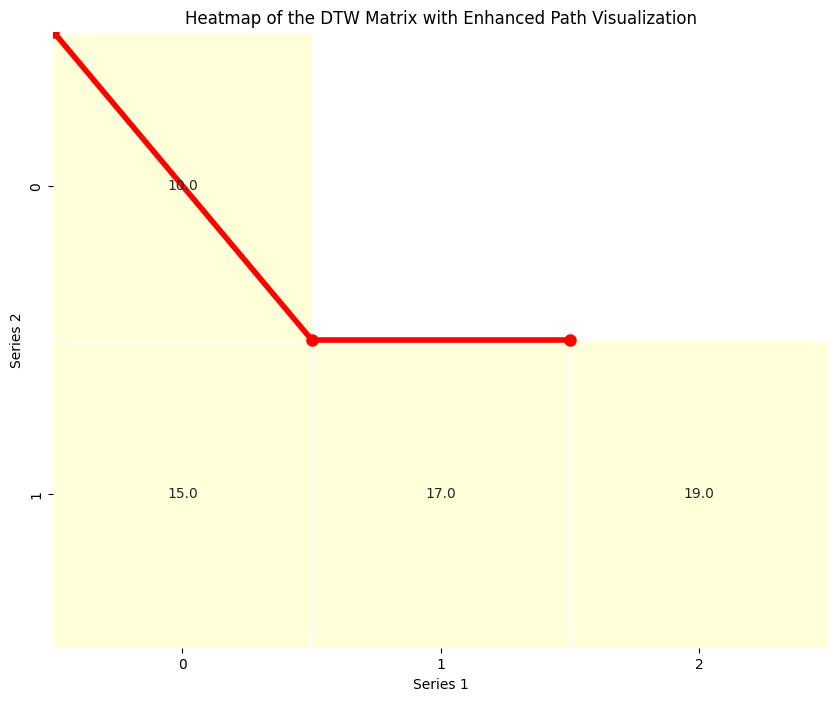

In [7]:
A = np.matrix([[2, 3,  4],
               [3, 3.5,4]])

T = np.matrix([[5,6],
               [5,4]])

At = A.T
Tt = T.T
mat = dtw_matrix(At, Tt)
print(f"The matrix:\n{mat}")

path = path_trace(mat)
print(f"\nThe path:\n{path}")
visualiser_DTW_heatmap(mat,path)

The matrix:
[[14. inf inf]
 [23. 28. 42.]
 [27. 31. 40.]]

The path:
[(2, 2), (1, 1), (0, 0)]


c:\Users\Manina\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


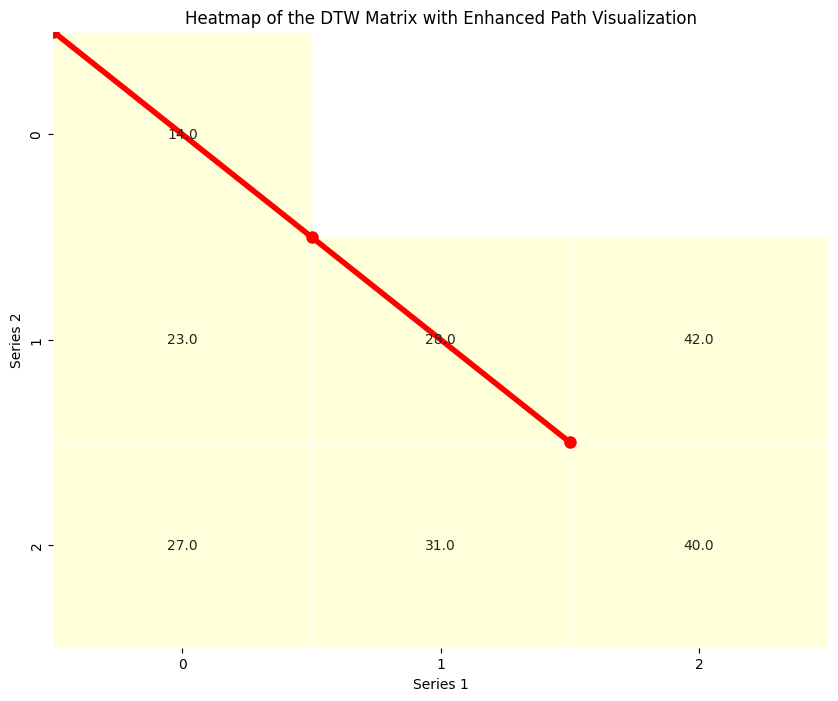

In [8]:
A = np.matrix([[2,1,6],
               [2,1,3]])

T = np.matrix([[-4,-2,-2],
               [1,-3,2]])

At = A.T
Tt = T.T
mat = dtw_matrix(At, Tt)
print(f"The matrix:\n{mat}")

path = path_trace(mat)
print(f"\nThe path:\n{path}")
visualiser_DTW_heatmap(mat,path)

**TEST 3**

The matrix:
[[12. inf inf]
 [16. 20. 27.]]

The path:
[(1, 2), (1, 1), (0, 0)]


c:\Users\Manina\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


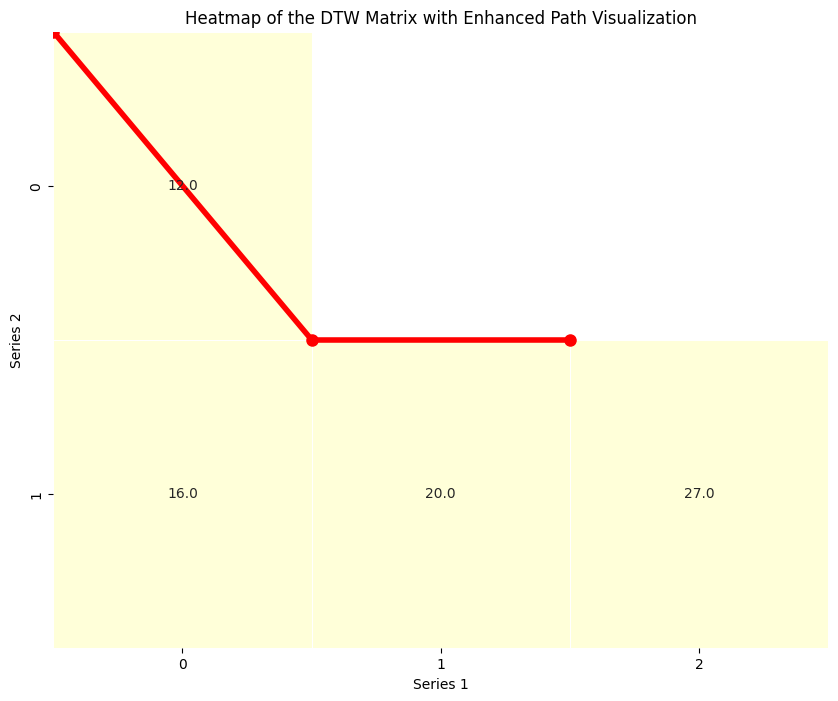

In [9]:
A = np.matrix([[0,2,3],
               [4,0,3],
               [3,1,0]])

T = np.matrix([[2,0],
               [3,1],
               [0,2]])

At = A.T
Tt = T.T
mat = dtw_matrix(At, Tt)
print(f"The matrix:\n{mat}")

path = path_trace(mat)
print(f"\nThe path:\n{path}")
visualiser_DTW_heatmap(mat,path)